========PYSPARK========
Number of samples: 14665
Estimated value of Pi is 3.1372655983634505
Absolute error is 0.00432705522634258
Time taken is 1.5615463256835938 seconds
RAM usage: 2.10%
CPU usage: 12.70%


Number of samples: 85395
Estimated value of Pi is 3.132736108671468
Absolute error is 0.008856544918325326
Time taken is 0.27199387550354004 seconds
RAM usage: 2.10%
CPU usage: 78.60%


Number of samples: 23756
Estimated value of Pi is 3.1397541673682436
Absolute error is 0.0018384862215494735
Time taken is 0.33757972717285156 seconds
RAM usage: 2.20%
CPU usage: 79.60%


Number of samples: 79506
Estimated value of Pi is 3.144265841571705
Absolute error is 0.002673187981911962
Time taken is 0.2980506420135498 seconds
RAM usage: 2.20%
CPU usage: 78.30%


Number of samples: 28795
Estimated value of Pi is 3.1392950164959195
Absolute error is 0.00229763709387365
Time taken is 0.30521416664123535 seconds
RAM usage: 2.30%
CPU usage: 79.70%


Number of samples: 45987
Estimated value of Pi

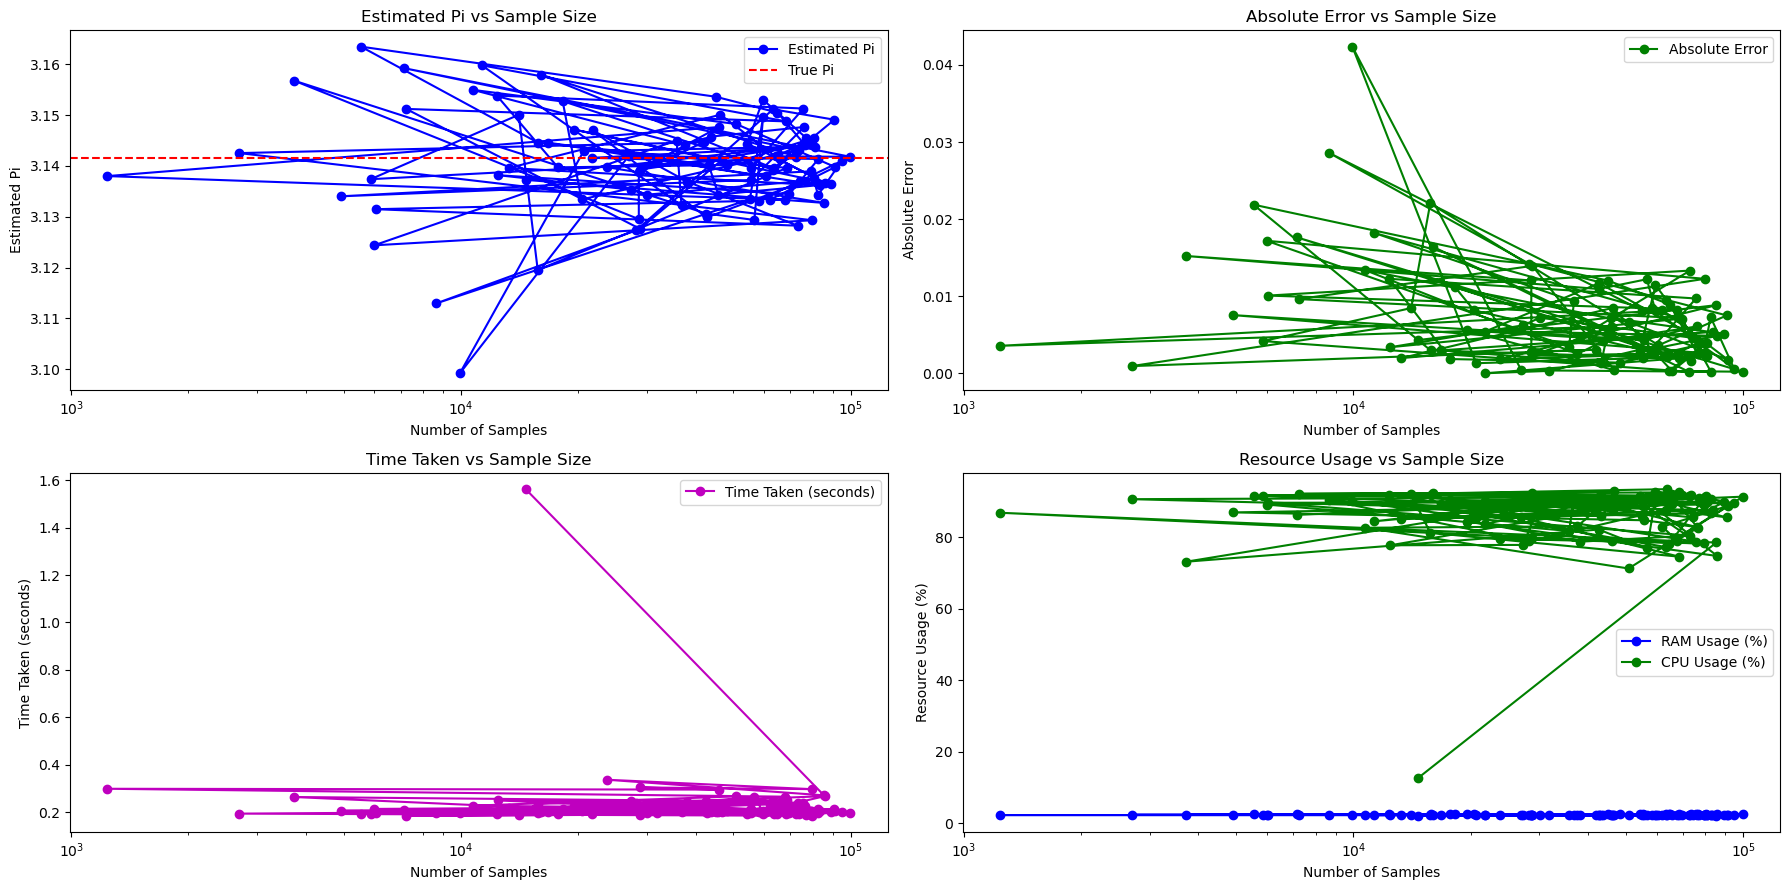

In [1]:
from pyspark import SparkContext, SparkConf
import random
import math
import time
import matplotlib.pyplot as plt
import psutil
import numpy as np
def is_point_inside_unit_circle(p):
    x, y = random.random(), random.random()
    return x*x + y*y <= 1

if __name__ == "__main__":
    # Stop any existing SparkContext
    try:
        sc.stop()
    except:
        pass

    # Initialize Spark Context with increased resources
    conf = SparkConf().setAppName("MonteCarloSimulation").set("spark.executor.memory", "4g").set("spark.executor.cores", "2")
    sc = SparkContext(conf=conf)

    # List of different numbers of samples
    sample_sizes = np.random.randint(10, 100001, 100).tolist()

    # Lists to store results
    pi_estimates = []
    absolute_errors = []
    durations = []
    ram_usage = []
    cpu_usage = []
    print("========PYSPARK========")
    # Iterate over different sample sizes
    for num_samples in sample_sizes:
        # Start timing
        start_time = time.time()

        # Distribute the samples across the cluster
        samples = sc.parallelize(range(0, num_samples))

        # Perform the Monte Carlo simulation
        count = samples.filter(is_point_inside_unit_circle).count()

        # Estimate Pi
        pi_estimate = 4 * count / num_samples
        pi_estimates.append(pi_estimate)

        # Known value of Pi
        true_pi = math.pi

        # Calculate the absolute error
        absolute_error = abs(pi_estimate - true_pi)
        absolute_errors.append(absolute_error)

        # End timing
        end_time = time.time()

        # Calculate the time taken
        duration = end_time - start_time
        durations.append(duration)

        # Retrieve system's RAM and CPU usage
        ram_percent = psutil.virtual_memory().percent
        cpu_percent = psutil.cpu_percent()

        ram_usage.append(ram_percent)
        cpu_usage.append(cpu_percent)

        # Print the result, the accuracy, and the time taken
        print(f"Number of samples: {num_samples}")
        print(f"Estimated value of Pi is {pi_estimate}")
        print(f"Absolute error is {absolute_error}")
        print(f"Time taken is {duration} seconds")
        print(f"RAM usage: {ram_percent:.2f}%")
        print(f"CPU usage: {cpu_percent:.2f}%")
        print("\n")

    # Stop the Spark Context
    sc.stop()

    # Plotting results
    plt.figure(figsize=(18, 9))

    # Plot 1: Estimated Pi vs Sample Size
    plt.subplot(2, 2, 1)
    plt.plot(sample_sizes, pi_estimates, marker='o', linestyle='-', color='b', label='Estimated Pi')
    plt.axhline(y=math.pi, color='r', linestyle='--', label='True Pi')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Estimated Pi')
    plt.title('Estimated Pi vs Sample Size')
    plt.legend()

    # Plot 2: Absolute Error vs Sample Size
    plt.subplot(2, 2, 2)
    plt.plot(sample_sizes, absolute_errors, marker='o', linestyle='-', color='g',label='Absolute Error')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Absolute Error')
    plt.title('Absolute Error vs Sample Size')
    plt.legend()

    # Plot 3: Time Taken vs Sample Size
    plt.subplot(2, 2, 3)
    plt.plot(sample_sizes, durations, marker='o', linestyle='-', color='m',label='Time Taken (seconds)')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Time Taken (seconds)')
    plt.title('Time Taken vs Sample Size')
    plt.legend()

    # Plot 4: Resource Usage
    plt.subplot(2, 2, 4)
    plt.plot(sample_sizes, ram_usage, marker='o', linestyle='-', color='b', label='RAM Usage (%)')
    plt.plot(sample_sizes, cpu_usage, marker='o', linestyle='-', color='g', label='CPU Usage (%)')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Resource Usage (%)')
    plt.title('Resource Usage vs Sample Size')
    plt.legend()

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()


========DASK========
Number of samples: 79711
Estimated value of Pi is 3.1393298059964727
Absolute error is 0.002262847593320405
Time taken is 0.05247616767883301 seconds
RAM usage: 2.30%
CPU usage: 10.50%


Number of samples: 97842
Estimated value of Pi is 3.1352761852191042
Absolute error is 0.006316468370688888
Time taken is 0.0884854793548584 seconds
RAM usage: 2.30%
CPU usage: 32.10%


Number of samples: 1134
Estimated value of Pi is 3.1431082766092273
Absolute error is 0.001515623019434198
Time taken is 0.14950895309448242 seconds
RAM usage: 2.30%
CPU usage: 26.80%


Number of samples: 77452
Estimated value of Pi is 3.122545525241397
Absolute error is 0.019047128348395947
Time taken is 0.17342758178710938 seconds
RAM usage: 2.30%
CPU usage: 28.20%


Number of samples: 15431
Estimated value of Pi is 3.142465044018643
Absolute error is 0.0008723904288499007
Time taken is 0.18802237510681152 seconds
RAM usage: 2.30%
CPU usage: 26.10%


Number of samples: 99315
Estimated value of Pi 

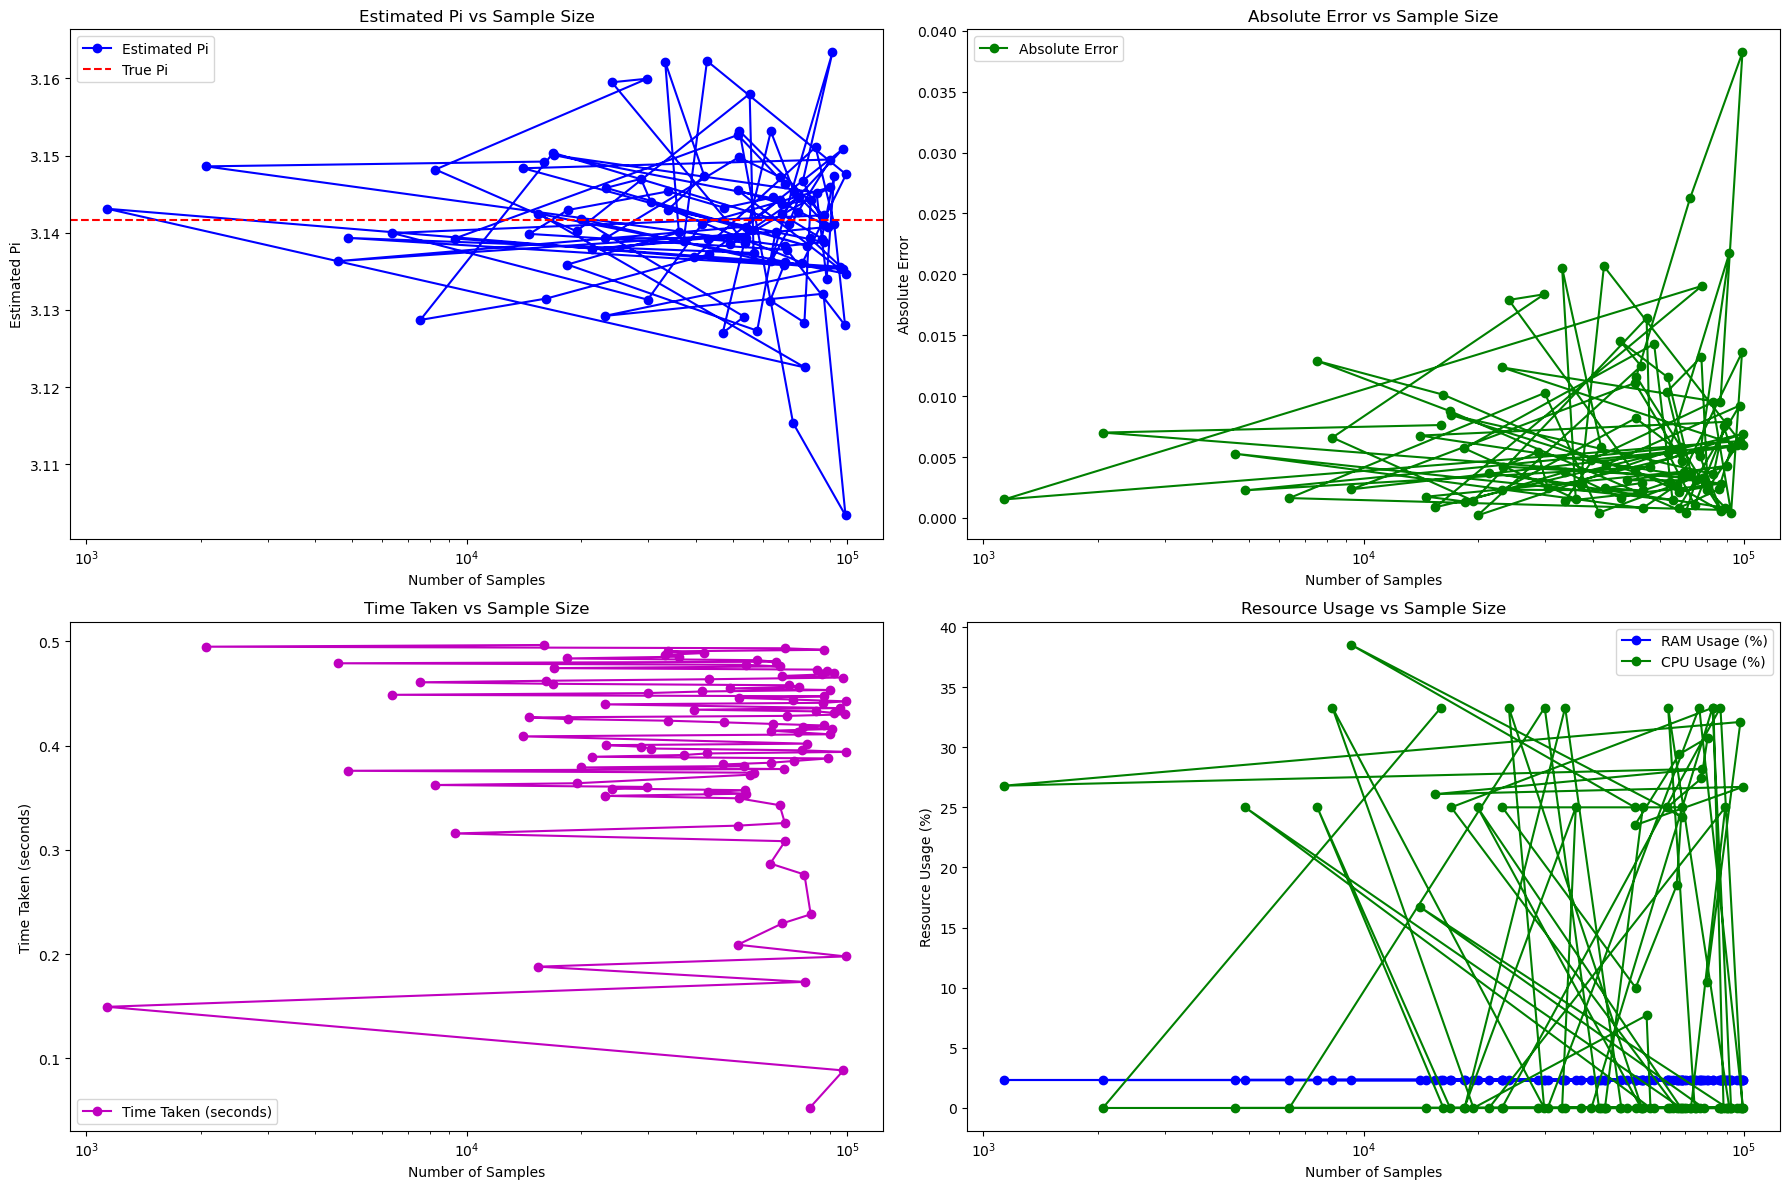

In [2]:
import dask
from dask.distributed import Client, as_completed
import random
import math
import time
import matplotlib.pyplot as plt
import psutil

# Function to perform Monte Carlo simulation to estimate Pi
def monte_carlo_simulation(num_samples):
    def is_point_inside_unit_circle(_):
        x, y = random.random(), random.random()
        return x*x + y*y <= 1
    
    counts = [is_point_inside_unit_circle(_) for _ in range(num_samples)]
    count_inside_circle = sum(counts)
    
    pi_estimate = 4 * count_inside_circle / num_samples
    return pi_estimate

if __name__ == "__main__":
    # Dask Client setup
    client = Client()

    sample_sizes = np.random.randint(10, 100001, 100).tolist()

    futures = []
    for num_samples in sample_sizes:
        # Scatter the function and arguments to the workers
        future = client.submit(monte_carlo_simulation, num_samples)
        futures.append(future)

    pi_estimates = []
    absolute_errors = []
    durations = []
    ram_usage = []
    cpu_usage = []

    start_time = time.time()
    print("========DASK========")
    # Retrieve results as they complete
    for i, future in enumerate(as_completed(futures)):
        result = future.result()
        pi_estimates.append(result)

        # Calculate absolute error
        absolute_error = abs(result - math.pi)
        absolute_errors.append(absolute_error)

        # Calculate duration
        end_time = time.time()
        duration = end_time - start_time
        durations.append(duration)

        # Retrieve system's RAM and CPU usage using psutil
        ram_percent = psutil.virtual_memory().percent
        cpu_percent = psutil.cpu_percent()

        ram_usage.append(ram_percent)
        cpu_usage.append(cpu_percent)

        # Print the result, the accuracy, and the time taken
        print(f"Number of samples: {sample_sizes[i]}")
        print(f"Estimated value of Pi is {result}")
        print(f"Absolute error is {absolute_error}")
        print(f"Time taken is {duration} seconds")
        print(f"RAM usage: {ram_percent:.2f}%")
        print(f"CPU usage: {cpu_percent:.2f}%")
        print("\n")

    # Close the Dask client
    client.close()

    # Plotting results
    plt.figure(figsize=(18, 12))

    # Plot 1: Estimated Pi vs Sample Size
    plt.subplot(2, 2, 1)
    plt.plot(sample_sizes, pi_estimates, marker='o', linestyle='-', color='b', label='Estimated Pi')
    plt.axhline(y=math.pi, color='r', linestyle='--', label='True Pi')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Estimated Pi')
    plt.title('Estimated Pi vs Sample Size')
    plt.legend()

    # Plot 2: Absolute Error vs Sample Size
    plt.subplot(2, 2, 2)
    plt.plot(sample_sizes, absolute_errors, marker='o', linestyle='-', color='g', label='Absolute Error')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Absolute Error')
    plt.title('Absolute Error vs Sample Size')
    plt.legend()

    # Plot 3: Time Taken vs Sample Size
    plt.subplot(2, 2, 3)
    plt.plot(sample_sizes, durations, marker='o', linestyle='-', color='m', label='Time Taken (seconds)')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Time Taken (seconds)')
    plt.title('Time Taken vs Sample Size')
    plt.legend()

    # Plot 4: Resource Usage
    plt.subplot(2, 2, 4)
    plt.plot(sample_sizes, ram_usage, marker='o', linestyle='-', color='b', label='RAM Usage (%)')
    plt.plot(sample_sizes, cpu_usage, marker='o', linestyle='-', color='g', label='CPU Usage (%)')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Resource Usage (%)')
    plt.title('Resource Usage vs Sample Size')
    plt.legend()

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()


2024-07-19 15:54:14,873	WARNING services.py:2010 -- WARNING: The object store is using /tmp instead of /dev/shm because /dev/shm has only 67108864 bytes available. This will harm performance! You may be able to free up space by deleting files in /dev/shm. If you are inside a Docker container, you can increase /dev/shm size by passing '--shm-size=10.24gb' to 'docker run' (or add it to the run_options list in a Ray cluster config). Make sure to set this to more than 30% of available RAM.
2024-07-19 15:54:15,013	INFO worker.py:1788 -- Started a local Ray instance.


========RAY========
Number of samples: 25317
Estimated value of Pi is 3.144290397756448
Absolute error is 0.002697744166654914
Time taken is 3.4947259426116943 seconds
RAM usage: 3.60%
CPU usage: 39.30%


Number of samples: 37007
Estimated value of Pi is 3.136055340881455
Absolute error is 0.005537312708338238
Time taken is 8.63352346420288 seconds
RAM usage: 3.70%
CPU usage: 53.80%


Number of samples: 19335
Estimated value of Pi is 3.129454357382984
Absolute error is 0.012138296206809063
Time taken is 11.433485746383667 seconds
RAM usage: 3.70%
CPU usage: 50.60%


Number of samples: 95159
Estimated value of Pi is 3.150390399226558
Absolute error is 0.00879774563676472
Time taken is 26.28798198699951 seconds
RAM usage: 3.90%
CPU usage: 49.20%


Number of samples: 25450
Estimated value of Pi is 3.1476620825147346
Absolute error is 0.006069428924941445
Time taken is 30.049142837524414 seconds
RAM usage: 3.80%
CPU usage: 50.60%


Number of samples: 55110
Estimated value of Pi is 3.140918

(is_point_inside_unit_cir pid=33369) cle


Number of samples: 95514
Estimated value of Pi is 3.134242100634462
Absolute error is 0.007350552955331047
Time taken is 114.91946911811829 seconds
RAM usage: 4.00%
CPU usage: 47.30%


Number of samples: 5212
Estimated value of Pi is 3.148119723714505
Absolute error is 0.006527070124711987
Time taken is 115.74149227142334 seconds
RAM usage: 4.00%
CPU usage: 48.40%


Number of samples: 94077
Estimated value of Pi is 3.144488025766128
Absolute error is 0.0028953721763347318
Time taken is 130.4729392528534 seconds
RAM usage: 4.00%
CPU usage: 48.80%


Number of samples: 50243
Estimated value of Pi is 3.1437613199848737
Absolute error is 0.0021686663950806206
Time taken is 138.05472421646118 seconds
RAM usage: 4.00%
CPU usage: 50.20%


Number of samples: 3471
Estimated value of Pi is 3.1333909536156725
Absolute error is 0.008201699974120569
Time taken is 138.59249305725098 seconds
RAM usage: 4.00%
CPU usage: 44.40%


Number of samples: 29591
Estimated value of Pi is 3.140008786455341
Absolu

(is_point_inside_unit_circle pid=33374) :task_na
(is_point_inside_unit_circle pid=33374) me:is_point_inside_unit_circle


Number of samples: 12047
Estimated value of Pi is 3.133726238897651
Absolute error is 0.007866414692142332
Time taken is 298.6589195728302 seconds
RAM usage: 4.00%
CPU usage: 50.90%


Number of samples: 52517
Estimated value of Pi is 3.1422967800902564
Absolute error is 0.0007041265004632535
Time taken is 307.4422347545624 seconds
RAM usage: 4.10%
CPU usage: 46.70%


Number of samples: 60551
Estimated value of Pi is 3.140625258046936
Absolute error is 0.0009673955428572967
Time taken is 317.53772377967834 seconds
RAM usage: 4.00%
CPU usage: 46.40%


Number of samples: 36057
Estimated value of Pi is 3.124941065535125
Absolute error is 0.016651588054668043
Time taken is 323.4063358306885 seconds
RAM usage: 4.00%
CPU usage: 46.80%


Number of samples: 81141
Estimated value of Pi is 3.143515608631888
Absolute error is 0.0019229550420947206
Time taken is 337.0300495624542 seconds
RAM usage: 4.00%
CPU usage: 46.40%


Number of samples: 99700
Estimated value of Pi is 3.150852557673019
Absolut

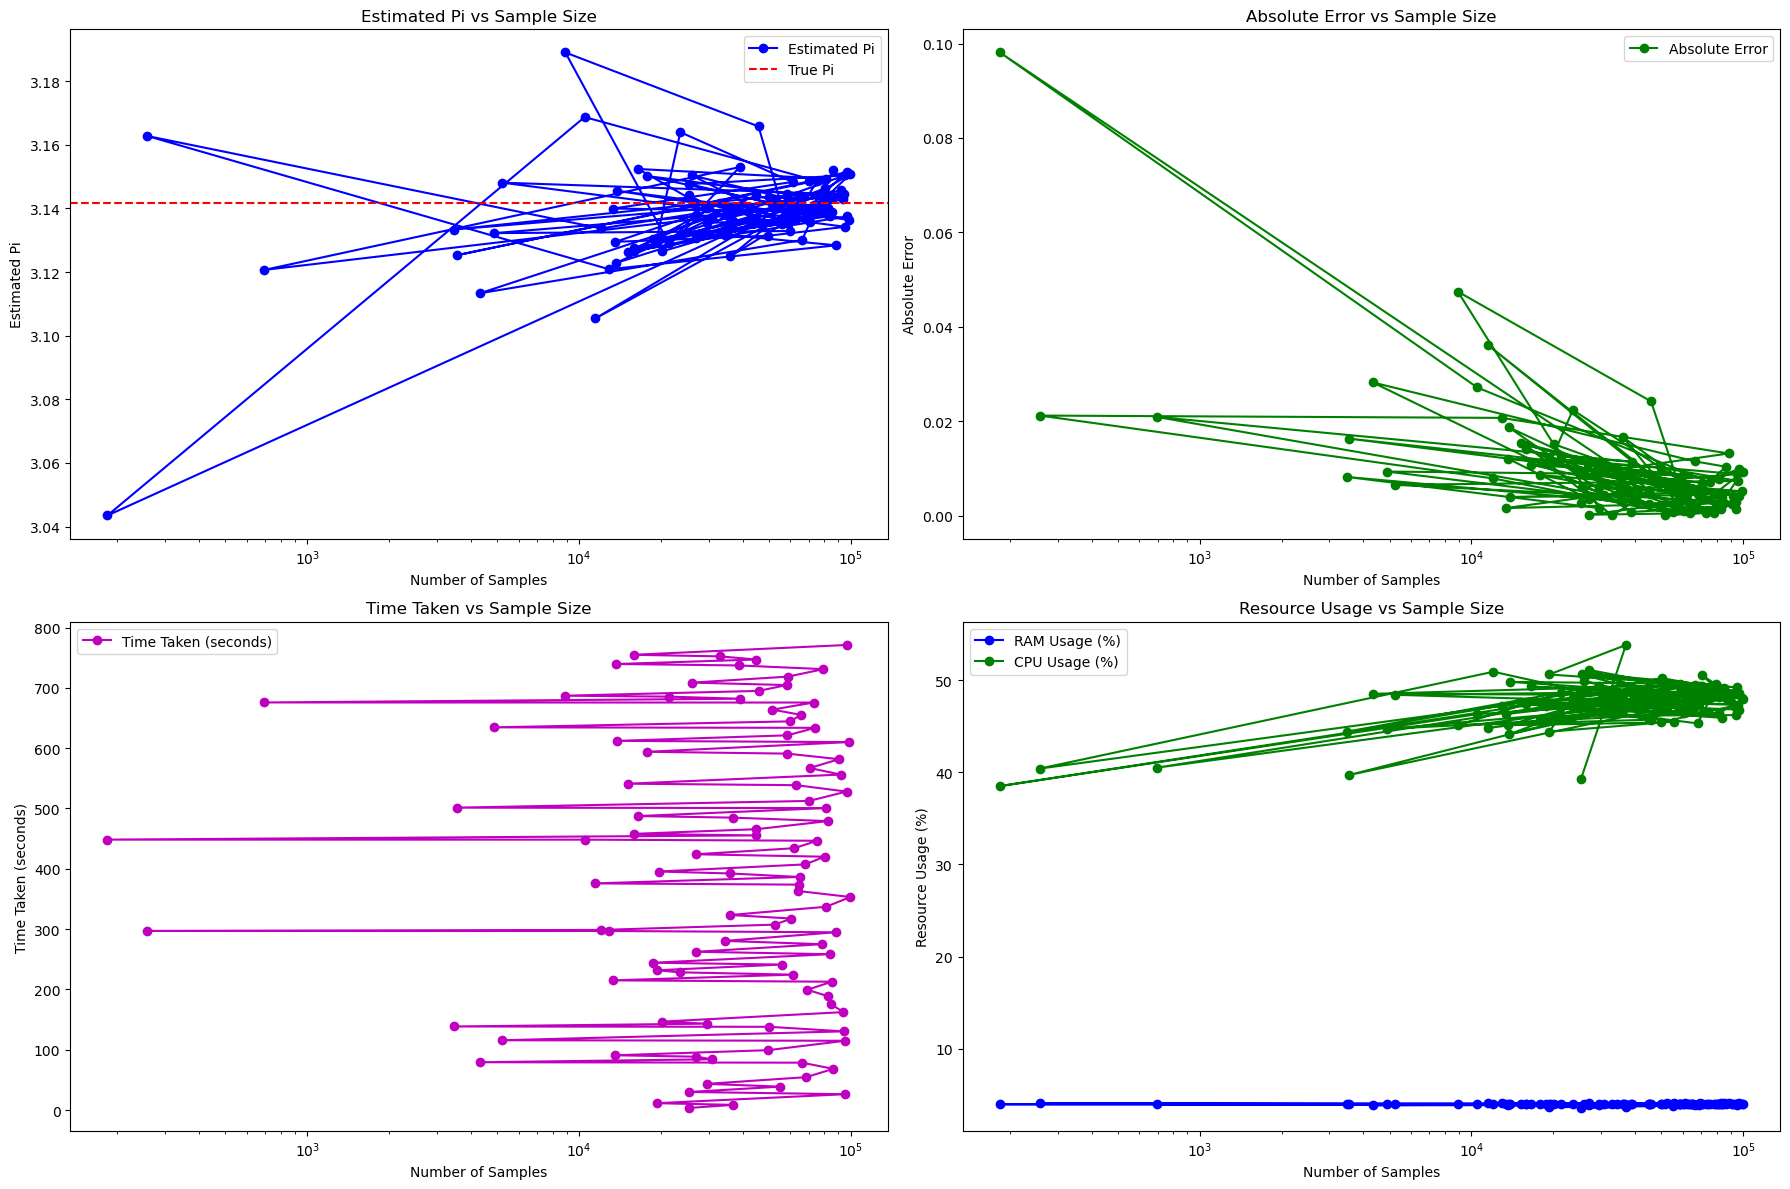

In [3]:
# pip install ray
import ray
import random
import math
import time
import matplotlib.pyplot as plt
import psutil

# Initialize Ray
ray.init()

# Function to check if a point is inside the unit circle
@ray.remote
def is_point_inside_unit_circle():
    x, y = random.random(), random.random()
    return x*x + y*y <= 1

# Function to perform Monte Carlo simulation to estimate Pi
def monte_carlo_simulation(num_samples):
    # Submit tasks to Ray workers
    futures = [is_point_inside_unit_circle.remote() for _ in range(num_samples)]
    
    # Count the number of points inside the circle
    count_inside_circle = sum(ray.get(futures))
    
    # Estimate Pi
    pi_estimate = 4 * count_inside_circle / num_samples
    return pi_estimate

if __name__ == "__main__":
    sample_sizes = np.random.randint(10, 100001, 100).tolist()

    pi_estimates = []
    absolute_errors = []
    durations = []
    ram_usage = []
    cpu_usage = []

    start_time = time.time()
    print("========RAY========")
    # Perform Monte Carlo simulation for different sample sizes
    for num_samples in sample_sizes:
        # Execute Monte Carlo simulation using Ray
        result = monte_carlo_simulation(num_samples)
        pi_estimates.append(result)

        # Calculate absolute error
        absolute_error = abs(result - math.pi)
        absolute_errors.append(absolute_error)

        # Calculate duration
        end_time = time.time()
        duration = end_time - start_time
        durations.append(duration)

        # Retrieve system's RAM and CPU usage using psutil
        ram_percent = psutil.virtual_memory().percent
        cpu_percent = psutil.cpu_percent()

        ram_usage.append(ram_percent)
        cpu_usage.append(cpu_percent)

        # Print the result, the accuracy, and the time taken
        print(f"Number of samples: {num_samples}")
        print(f"Estimated value of Pi is {result}")
        print(f"Absolute error is {absolute_error}")
        print(f"Time taken is {duration} seconds")
        print(f"RAM usage: {ram_percent:.2f}%")
        print(f"CPU usage: {cpu_percent:.2f}%")
        print("\n")

    # Shutdown Ray
    ray.shutdown()

    # Plotting results
    plt.figure(figsize=(18, 12))

    # Plot 1: Estimated Pi vs Sample Size
    plt.subplot(2, 2, 1)
    plt.plot(sample_sizes, pi_estimates, marker='o', linestyle='-', color='b', label='Estimated Pi')
    plt.axhline(y=math.pi, color='r', linestyle='--', label='True Pi')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Estimated Pi')
    plt.title('Estimated Pi vs Sample Size')
    plt.legend()

    # Plot 2: Absolute Error vs Sample Size
    plt.subplot(2, 2, 2)
    plt.plot(sample_sizes, absolute_errors, marker='o', linestyle='-', color='g', label='Absolute Error')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Absolute Error')
    plt.title('Absolute Error vs Sample Size')
    plt.legend()

    # Plot 3: Time Taken vs Sample Size
    plt.subplot(2, 2, 3)
    plt.plot(sample_sizes, durations, marker='o', linestyle='-', color='m', label='Time Taken (seconds)')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Time Taken (seconds)')
    plt.title('Time Taken vs Sample Size')
    plt.legend()

    # Plot 4: Resource Usage
    plt.subplot(2, 2, 4)
    plt.plot(sample_sizes, ram_usage, marker='o', linestyle='-', color='b', label='RAM Usage (%)')
    plt.plot(sample_sizes, cpu_usage, marker='o', linestyle='-', color='g', label='CPU Usage (%)')
    plt.xscale('log')
    plt.xlabel('Number of Samples')
    plt.ylabel('Resource Usage (%)')
    plt.title('Resource Usage vs Sample Size')
    plt.legend()

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()


In [4]:
print('over')

over
